In [ ]:
!pip install qiskit[nature]

## Protein Folding - No Chain - AER Simulator 

In [ ]:
from qiskit_nature.problems.sampling.protein_folding.interactions.random_interaction import (
    RandomInteraction,
)
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import (
    MiyazawaJerniganInteraction,
)
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import (
    ProteinFoldingProblem,
)

from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters

from qiskit.utils import algorithm_globals, QuantumInstance

algorithm_globals.random_seed = 23

In [ ]:
main_chain = "YPYFIP"

In [ ]:
side_chains = [""] * 6

In [ ]:
random_interaction = RandomInteraction()
mj_interaction = MiyazawaJerniganInteraction()

In [ ]:
penalty_back = 10
penalty_chiral = 10
penalty_1 = 10

penalty_terms = PenaltyParameters(penalty_chiral, penalty_back, penalty_1)

In [ ]:
peptide = Peptide(main_chain, side_chains)

In [ ]:
protein_folding_problem = ProteinFoldingProblem(peptide, mj_interaction, penalty_terms)
qubit_op = protein_folding_problem.qubit_op()

In [ ]:
print(qubit_op)

929.4905 * IIIIII
- 924.4905 * ZIIIII
- 310.0 * IZIIII
+ 310.0 * ZZIIII
+ 2.5 * IIZIII
- 2.5 * ZIZIII
- 207.5 * IZZIII
+ 207.5 * ZZZIII
+ 300.0 * IIIZII
- 302.5 * ZIIZII
- 100.0 * IZIZII
+ 102.5 * ZZIZII
- 2.5 * IIIIZI
+ 2.5 * ZIIIZI
- 100.0 * IIZIZI
+ 102.5 * ZIZIZI
+ 202.5 * IIIZZI
- 202.5 * ZIIZZI
- 100.0 * IZZZZI
+ 102.5 * ZZZZZI
+ 205.0 * IIIIIZ
- 205.0 * ZIIIIZ
+ 102.5 * IIZIIZ
- 102.5 * ZIZIIZ
- 102.5 * IZZIIZ
+ 102.5 * ZZZIIZ
- 97.5 * IIIIZZ
+ 100.0 * ZIIIZZ
+ 97.5 * IIIZZZ
- 100.0 * ZIIZZZ


In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=100,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000000': 0.1,
                      '000011': 0.2449489742783178,
                      '000100': 0.4242640687119285,
                      '000101': 0.1414213562373095,
                      '001100': 0.33166247903553997,
                      '001101': 0.17320508075688773,
                      '001111': 0.22360679774997896,
                      '010000': 0.1,
                      '010011': 0.31622776601683794,
                      '010100': 0.31622776601683794,
                      '010101': 0.1414213562373095,
                      '010111': 0.17320508075688773,
                      '011100': 0.2,
                      '100100': 0.1,
                      '100101': 0.1414213562373095,
                      '100111': 0.1,
                      '101100': 0.22360679774997896,
                      '101111': 0.1,
                      '110011': 0.22360679774997896,
                      '11

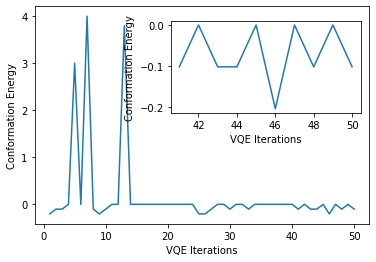

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

## with 1000 shots

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=1000,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000001': 0.044721359549995794,
                      '000101': 0.044721359549995794,
                      '010001': 0.03162277660168379,
                      '010101': 0.06324555320336758,
                      '010111': 0.03162277660168379,
                      '100000': 0.05477225575051661,
                      '100001': 0.23874672772626646,
                      '100010': 0.08366600265340755,
                      '100011': 0.1224744871391589,
                      '100100': 0.06324555320336758,
                      '100101': 0.4449719092257398,
                      '100110': 0.21213203435596426,
                      '100111': 0.39749213828703583,
                      '101000': 0.07745966692414834,
                      '101001': 0.2863564212655271,
                      '101010': 0.19493588689617927,
                      '101011': 0.2863564212655271,
                      '101100': 

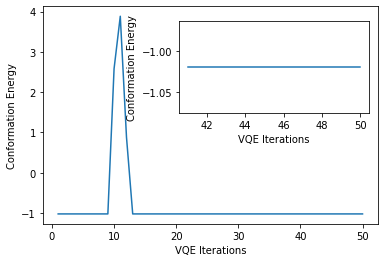

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([0.44, 0.51, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

## With 8192 Shots

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=8192,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000000': 0.14363106492851746,
                      '000001': 0.06536406457297465,
                      '000010': 0.5625,
                      '000011': 0.321168824860851,
                      '000100': 0.015625,
                      '000101': 0.011048543456039806,
                      '001000': 0.015625,
                      '001010': 0.04555431167847891,
                      '001011': 0.03125,
                      '001100': 0.05412658773652741,
                      '001101': 0.015625,
                      '001110': 0.20817050928865982,
                      '001111': 0.11158481919598204,
                      '010000': 0.12103072956898178,
                      '010001': 0.05846339666834283,
                      '010010': 0.4648273368951099,
                      '010011': 0.26539512111660984,
                      '010100': 0.02209708691207961,
                      '010101': 0.024

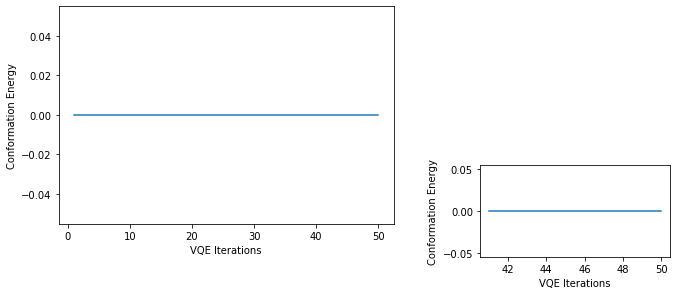

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([1.1, 0.01, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()

## 2000 shots

In [ ]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.algorithms import NumPyMinimumEigensolver, VQE
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit import execute, Aer

# set classical optimizer
optimizer = COBYLA(maxiter=50)

# set variational ansatz
ansatz = RealAmplitudes(reps=1)

# set the backend
backend_name = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend_name),
    shots=5000,
    seed_transpiler=algorithm_globals.random_seed,
    seed_simulator=algorithm_globals.random_seed,
)

counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


# initialize CVaR_alpha objective with alpha = 0.1
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

# initialize VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=store_intermediate_result,
)

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000000': 0.0469041575982343,
                      '000001': 0.0938083151964686,
                      '000010': 0.12569805089976535,
                      '000011': 0.1131370849898476,
                      '000100': 0.08124038404635961,
                      '000101': 0.12806248474865697,
                      '000110': 0.08717797887081347,
                      '000111': 0.07348469228349534,
                      '001000': 0.0282842712474619,
                      '001001': 0.09486832980505137,
                      '001010': 0.08944271909999159,
                      '001011': 0.08124038404635961,
                      '001100': 0.061644140029689765,
                      '001101': 0.12489995996796796,
                      '001110': 0.061644140029689765,
                      '001111': 0.044721359549995794,
                      '010001': 0.01414213562373095,
                      '010010':

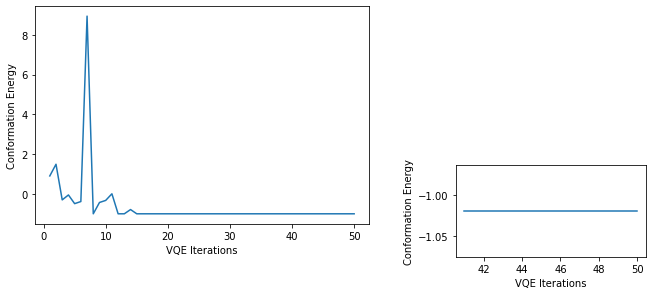

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

fig.add_axes([1.1, 0.01, 0.44, 0.32])

plt.plot(counts[40:], values[40:])
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")
plt.show()